In [128]:
import random as rand
import numpy as np
import matplotlib.pyplot as plt

溫度:173.12045946799748, 迭代次數:199
溫度:229.68769214385065, 迭代次數:198
溫度:308.7552195253987, 迭代次數:197
溫度:70.95494183541881, 迭代次數:196
溫度:2.553762814825588, 迭代次數:195
溫度:1.1375572022904015, 迭代次數:194
溫度:0.10509812818176904, 迭代次數:193
溫度:0.09407283468133244, 迭代次數:192
溫度:0.08523618354165334, 迭代次數:191
溫度:0.0779797705672056, 迭代次數:190
溫度:0.07190508685456204, 迭代次數:189
溫度:0.06673919959257464, 迭代次數:188
溫度:0.06228838462597138, 迭代次數:187
溫度:0.058411050143439086, 迭代次數:186
溫度:0.055001139154592656, 迭代次數:185
溫度:0.051977538846127554, 迭代次數:184
溫度:0.04927709063586071, 迭代次數:183
溫度:0.04684984157318642, 迭代次數:182
溫度:0.04465573676624242, 迭代次數:181
溫度:0.04266226463631189, 迭代次數:180
溫度:0.040842747870592215, 迭代次數:179
溫度:0.039175081554603655, 迭代次數:178
溫度:0.0376407870537122, 迭代次數:177
溫度:0.03622429274732057, 迭代次數:176
溫度:0.03491238032131999, 迭代次數:175
溫度:0.033693753615622796, 迭代次數:174
溫度:0.03255869937668247, 迭代次數:173
溫度:0.0314988177526684, 迭代次數:172
溫度:0.030506806293423876, 迭代次數:171
溫度:0.029576285412777296, 迭代次數:170
溫度:0.028701656

C:\Users\user\ipykernel_14636\199882288.py:32: RuntimeWarning: overflow encountered in exp
  if (y < self.Best_solution) or (rand.random() > np.exp((y - self.Best_solution)/t)):


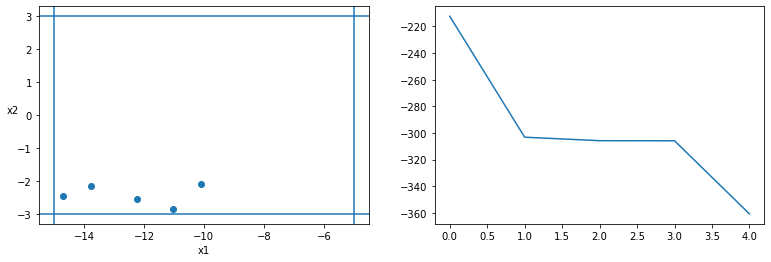

In [168]:
class SA_if_out_of_range_init():
    
    def __init__(self, t, Best_solution, x1_range, x2_range, result_arr):
        self.t = t
        self.Best_solution = Best_solution
        self.x1_range = x1_range
        self.x2_range = x2_range
        self.result_arr = result_arr
        
    def function(self, x1, x2):
        fx = 100*(x2 + (-0.01*(x1**2)) + 1) + 0.01*(x1+10)**2
        return fx

    def temp_update(self, t):
        t *= 1 - np.sin(t)
        return t
    
    def decay_rate_sigmoid(self, iter_):
        r = 1 - (1/(1 + np.exp(iter_)))
        return r
    
    def new_candidtate(self, x1, x2, iter_):
        new_x1 = x1 + np.random.randn(1) * self.decay_rate_sigmoid(iter_)
        new_x2 = x2 + np.random.randn(1) * self.decay_rate_sigmoid(iter_)
        if (new_x1 not in self.x1_range) or (new_x2 not in self.x2_range):
            new_x1 = rand.uniform(-15,-5)
            new_x2 = rand.uniform(-3,3)
        return new_x1, new_x2
    
    def store_or_pass(self, x1, x2):
        y = self.function(x1, x2)
        if (y < self.Best_solution) or (rand.random() > np.exp((y - self.Best_solution)/t)):
            self.Best_solution = y
            self.result_arr= np.append(self.result_arr,[x1,x2, self.Best_solution])
        else:
            pass
        return self.Best_solution, self.result_arr

        
t = 1000
Best_solution = 1000
iter_ = 200
result_arr = np.array([])
x1_range = range(-15, -5)
x2_range = range(-3, 3)

x1 = rand.uniform(-15,-5)
x2 = rand.uniform(-3,3)
sa = SA_if_out_of_range_init(t, Best_solution, x1_range, x2_range, arr_solution)
Best_solution, result_arr = sa.store_or_pass(x1, x2)
t = sa.temp_update(t)

iter_ -= 1
while t >= 0 and iter_ >= 0:
    print(f'溫度:{t}, 迭代次數:{iter_}')
    x1, x2 = sa.new_candidtate(x1,x2,iter_)
    Best_solution, result_arr = sa.store_or_pass(x1, x2)
    x1, x2 = sa.new_candidtate(x1, x2, iter_)
    t = sa.temp_update(t)
    iter_ -= 1
else:  
    result_arr = result_arr.reshape(int(len(result_arr)/3),3)
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.scatter(result_arr[:,0], result_arr[:,1])
    ax1.set_xlabel('x1')
    ax1.axvline(-15)
    ax1.axvline(-5)
    ax1.axhline(-3)
    ax1.axhline(3)
    ax1.set_ylabel('x2', rotation = 0)
    ax2.plot(result_arr[:,2])
    plt.show() 

In [ ]:
result_arr

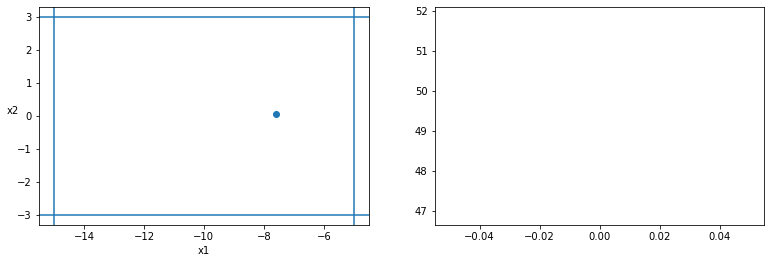

In [157]:
result_arr = result_arr.reshape(int(len(result_arr)/3),3)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
ax1.scatter(result_arr[:,0], result_arr[:,1])
ax1.set_xlabel('x1')
ax1.axvline(-15)
ax1.axvline(-5)
ax1.axhline(-3)
ax1.axhline(3)
ax1.set_ylabel('x2', rotation = 0)
ax2.plot(result_arr[:,2])
plt.show() 